,Description,Value
0,Session id,123
1,Target,predict_price
2,Target type,Regression
3,Original data shape,"(747, 14)"
4,Transformed data shape,"(747, 12)"
5,Transformed train set shape,"(522, 12)"
6,Transformed test set shape,"(225, 12)"
7,Ignore features,2
8,Numeric features,11
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,500962.3162,766058905832.6394,875247.9111,-1.2770,0.7177,0.9340
1,743108.2540,1443094820644.0183,1201288.8165,-0.2180,0.8026,0.9608
2,601922.8938,824587883851.6144,908068.2154,0.2272,0.8672,0.9087
3,494906.8152,397864857895.5639,630765.2954,0.2931,0.9104,1.3736
4,490256.1260,401997250306.6330,634032.5310,0.3755,0.7289,0.8359
5,631927.7615,1752466018352.6968,1323807.3947,0.2768,0.8014,1.0130
6,533194.2619,552090581384.9045,743027.9816,-0.0780,0.8097,1.0144
7,371789.5063,237205910178.4856,487037.8940,0.2141,0.5943,0.6770
8,719689.6346,1746265225774.7251,1321463.2896,0.4273,0.7855,0.7443


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,195176.6653,106035698184.6131,325631.2304,0.8985,0.3528,0.3175


                  NOP   Dist_Fasum    Dist_Shop  Dist_Faskes    Dist_SPBU  \
0  357401000100300300  3151.201172  1792.267334  3264.310303   295.355011   
1  357401000100300980  3286.004883  1943.251587  3237.478516   276.181488   
2  357401000100500850  3236.466309  2481.546875  2684.540283   872.852966   
3  357401000100501020  3223.718750  2618.646484  2536.789551  1030.719360   
4  357401000100501430  3093.937500  2348.281006  2701.025146   816.689148   

    Dist_Trans   Dist_Hotel    Dist_Govt  Dist_Sekol  Dist_Trunk     Dist_Sec  \
0   389.260284   937.635864   405.752991  236.551163  390.370483  1482.789673   
1   489.473145  1069.175659   397.644012  216.605820  334.112610  1565.928223   
2  1086.881470  1645.792480   990.588013  207.104904  738.442078  1232.870117   
3  1241.135010  1794.063354  1148.459961  305.547974  638.697876  1136.754883   
4   995.500000  1532.970581   937.890991   41.351185  788.482422  1158.043823   

   VALUE   Luas_Tanah  predict_price  prediction_l

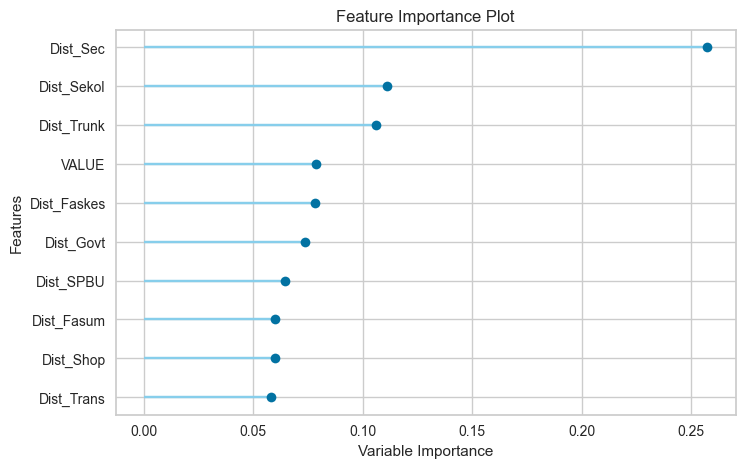

In [ ]:
import pandas as pd
from pycaret.regression import *

# 1. Membaca Data
df = pd.read_excel('D:/Data Projek/Projek(IDW)/virtual/projek_random_forest/data_training_747.xlsx')

# Membersihkan data (menghapus koma pada angka ribuan agar terbaca sebagai angka)
cols_to_clean = ['predict_price', 'Dist_Fasum', 'Dist_Shop', 'Dist_Faskes', 
                 'Dist_SPBU', 'Dist_Trans', 'Dist_Hotel', 'Dist_Govt', 
                 'Dist_Sekol', 'Dist_Trunk', 'Dist_Sec']

for col in cols_to_clean:
    # Cek jika kolom bertipe object/string sebelum replace
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)

# 2. Setup PyCaret
# ignore_features=['NOP'] akan mengabaikan kolom ID
# target='predict_price' adalah kolom yang ingin diprediksi
reg_setup = setup(data=df, 
                  target='predict_price', 
                  ignore_features=['NOP', 'Luas_Tanah'], 
                  session_id=123)

# 3. Membuat Model Random Forest
rf_model = create_model('rf')

# 4. Finalisasi Model (melatih pada seluruh dataset)
final_rf = finalize_model(rf_model)

# 5. Prediksi (contoh menggunakan data yang sama)
predictions = predict_model(final_rf, data=df)
print(predictions.head())

# 6. Plotting (Opsional) - Melihat fitur terpenting
plot_model(rf_model, plot='feature')

In [12]:
# 10. Save Model
# Menyimpan pipeline model ke file .pkl
nama_model = 'proyek_ml_harga_rf_747'

save_model(final_rf, nama_model)
print(f"Model berhasil disimpan sebagai {nama_model}.pkl")


Transformation Pipeline and Model Successfully Saved
Model berhasil disimpan sebagai proyek_ml_harga_rf_747.pkl
